In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc


from qiskit import QuantumCircuit, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer

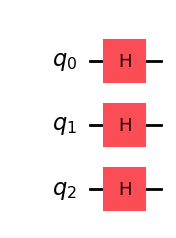

In [2]:
# Finding state vector of a multi-qubit system
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

In [3]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
final_state = svsim.run(qc).result().get_statevector()
print(final_state)

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


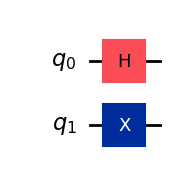

In [4]:
# Single qubit-gates on multi-qubit statevector
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

In [5]:
# let's use the unitary simulator
usim = Aer.get_backend('unitary_simulator')
unitary = usim.run(qc).result().get_unitary()
print(unitary)

Operator([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j]],
         input_dims=(2, 2), output_dims=(2, 2))


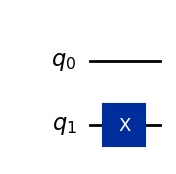

In [6]:
# Apply a single-qubit gate on a single qubit in a multi-qubit system
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

In [7]:
# Simulate the unitary
usim = Aer.get_backend('unitary_simulator')
unitary = usim.run(qc).result().get_unitary()
# Display the results:
print(unitary)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


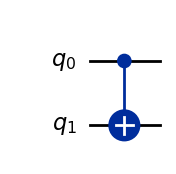

In [8]:
# Example of CNOT gate
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

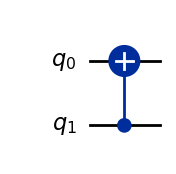

In [9]:
# Change control qubit
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(1,0)
# See the circuit:
qc.draw('mpl')

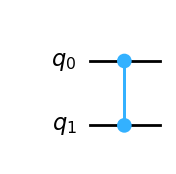

In [10]:
# Controlled Z - Example 1
qc = QuantumCircuit(2)
qc.cz(1,0)
qc.draw('mpl')

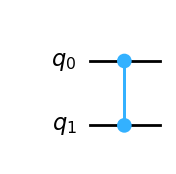

In [11]:
# Controlled Z - Example 2
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw('mpl')

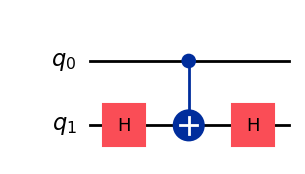

In [12]:
# Getting CZ from CX
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.draw('mpl')

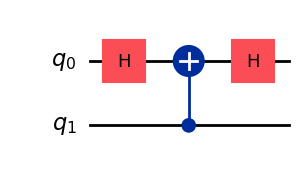

In [13]:
# Also, we can have
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(1,0)
qc.h(0)
qc.draw('mpl')

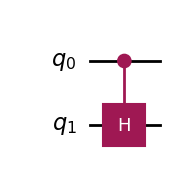

In [14]:
# Controlled H - Example 1
qc = QuantumCircuit(2)
qc.ch(0,1)
qc.draw('mpl')

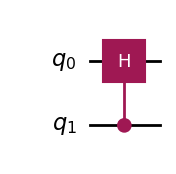

In [15]:
# Controlled H - Example 2
qc = QuantumCircuit(2)
qc.ch(1,0)
qc.draw('mpl')

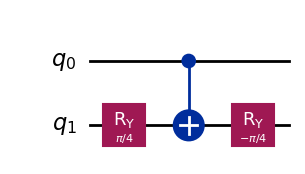

In [16]:
# Getting C-H using C-X
qc = QuantumCircuit(2)
# a controlled-H: prove it!
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.draw('mpl')

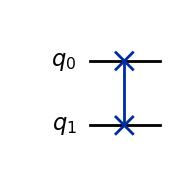

In [17]:
# Swap gate
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(0,1)
qc.draw('mpl')

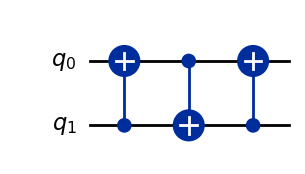

In [18]:
# Implementing SWAP using CNOT - Example 1
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
qc.draw('mpl')

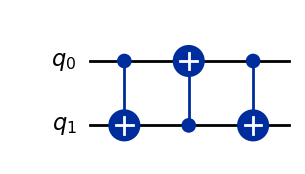

In [19]:
# Implementing SWAP using CNOT - Example 2
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw('mpl')

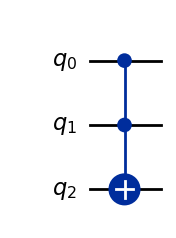

In [20]:
# Toffoli gate
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw('mpl')